## Scikit-Learn

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [41]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In [44]:
mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([4.13164983, 3.97660644, 3.67657094])

In [45]:
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([2.826802, 2.1594  , 3.650404])

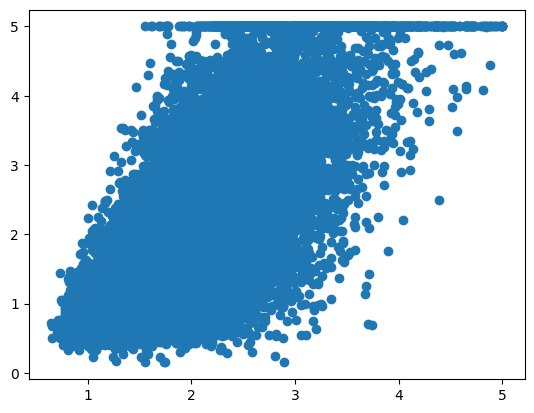

In [46]:
mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

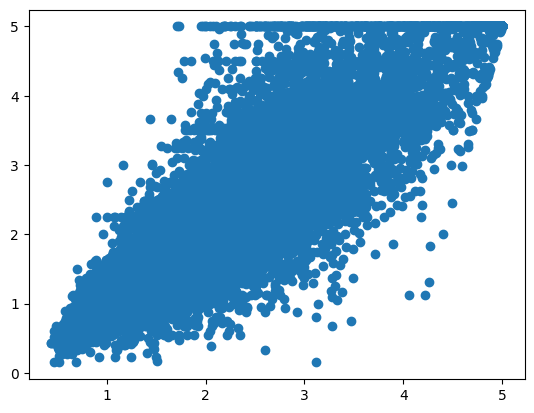

In [47]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

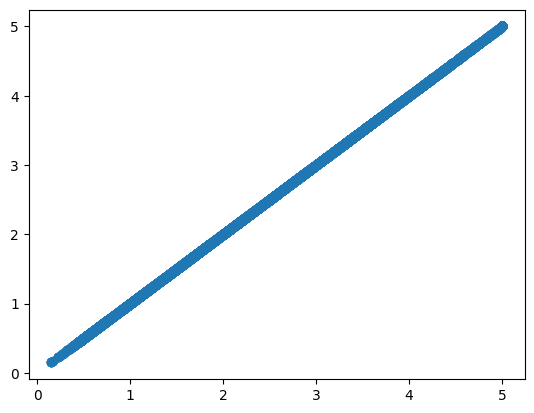

In [48]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

In [54]:
mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 5, 10, 25, 40]
                 },
                 cv=3)
mod.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 5, 10, 25, 40]})

In [55]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020598,0.006916,0.295310,0.023310,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,5
1,0.016143,0.000283,0.394698,0.028402,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,4
2,0.014007,0.002459,0.452683,0.034100,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,3
3,0.017708,0.001736,0.554312,0.033804,25,{'model__n_neighbors': 25},0.582019,0.599193,0.533020,0.571411,0.028037,1
4,0.015636,0.000215,0.638844,0.037312,40,{'model__n_neighbors': 40},0.579409,0.595339,0.531237,0.568662,0.027250,2


_________